<a href="https://colab.research.google.com/github/faisaladisoe/image-processing-lab/blob/master/Lab%205/source%20code/Lab5_1906293184_MuhammadFaisalAdiSoesatyo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# References



1.   https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
2.   https://scikit-image.org/docs/stable/api/skimage.color.html#module-skimage.color



# Import Libraries

In [91]:
import cv2 as cv
import numpy as np
from numpy import array, zeros
from matplotlib import pyplot as plt
from skimage.morphology import disk, ball
from skimage import color, io, filters, util, segmentation, exposure

# Thresholding

## Importing Image

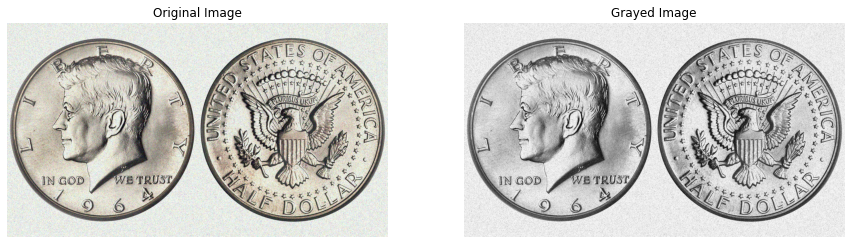

In [92]:
coin_image = io.imread('./images/noisy_coin.jpeg')
grayed = color.rgb2gray(coin_image)

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1); plt.imshow(coin_image, cmap='gray')
plt.title('Original Image'); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(grayed, cmap='gray')
plt.title('Grayed Image'); plt.axis('off')
plt.show()

## Simple Global Thresholding

### Noise Reduction

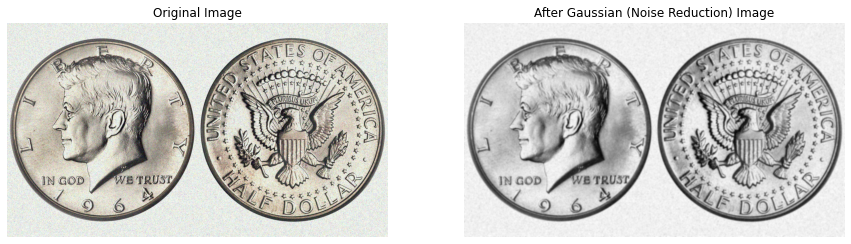

In [93]:
gaussian = util.img_as_ubyte(filters.gaussian(grayed, sigma=4))

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1); plt.imshow(coin_image, 'gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(gaussian, cmap='gray')
plt.title('After Gaussian (Noise Reduction) Image')
plt.axis('off')
plt.show()

### Edge Detection & Thresholding

Text(0.5, 1.0, 'Sobel Histogram')

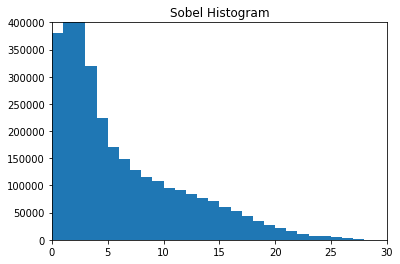

In [94]:
sobel = util.img_as_ubyte(filters.sobel(gaussian))
_, thresh = cv.threshold(sobel, 7, 255, cv.THRESH_BINARY)

plt.subplot(1,1,1); plt.hist(sobel.flatten(), 256, range=(0,256))
plt.xlim([0, 30]); plt.ylim([0, .4e6]); plt.title('Sobel Histogram')

### Plotting

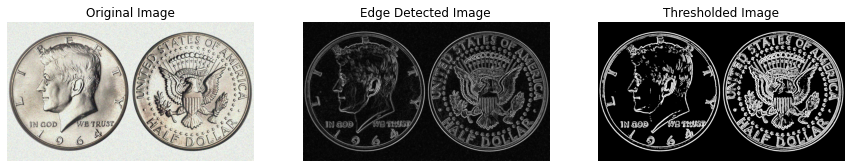

In [95]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 3, 1); plt.imshow(coin_image, 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2); plt.imshow(sobel, cmap='gray')
plt.title('Edge Detected Image')
plt.axis('off')

plt.subplot(1, 3, 3); plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.show()

## Otsu's Thresholding with Histogram 

### Thresholding

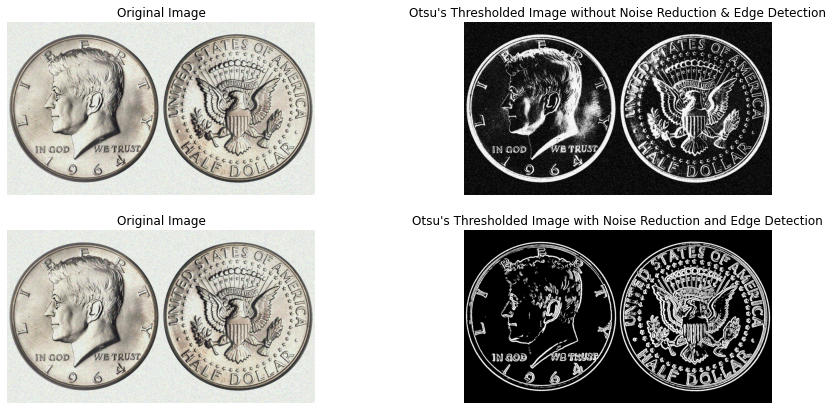

In [96]:
otsus_G = [util.img_as_ubyte(grayed), sobel]
otsus_T_g = filters.threshold_otsu(otsus_G[0])
otsus_T_s = filters.threshold_otsu(otsus_G[1])
otsus_S_g = util.img_as_float(otsus_G[0] > otsus_T_g)
otsus_S_s = util.img_as_float(otsus_G[1] > otsus_T_s)

plt.figure(figsize=(15,7))
plt.subplot(2,2,1); plt.imshow(coin_image)
plt.title('Original Image'); plt.axis("off")
plt.subplot(2,2,2); plt.imshow(1-otsus_S_g, cmap='gray')
plt.title("Otsu's Thresholded Image without Noise Reduction & Edge Detection"); plt.axis("off")
plt.subplot(2,2,3); plt.imshow(coin_image)
plt.title('Original Image'); plt.axis("off")
plt.subplot(2,2,4); plt.imshow(otsus_S_s, cmap='gray')
plt.title("Otsu's Thresholded Image with Noise Reduction and Edge Detection"); plt.axis("off")
plt.show()

### Histogram

Text(0.5, 1.0, "Otsu's with NR and ED")

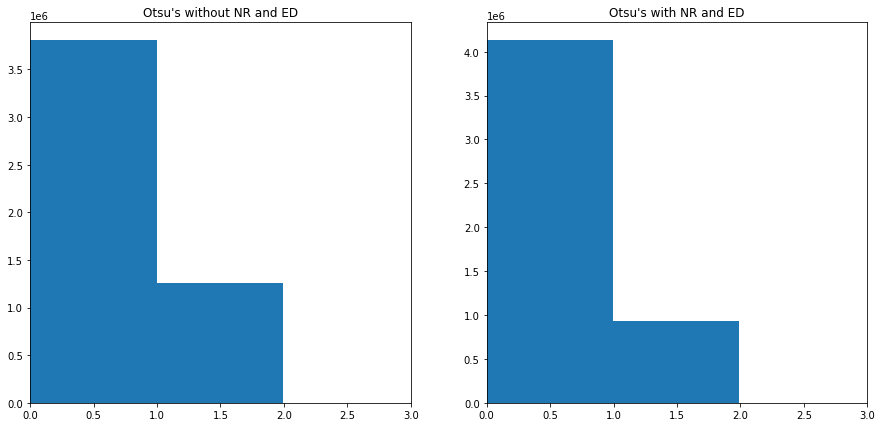

In [97]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.hist((1-otsus_S_g).flatten(), 256, range=(0,255)); plt.xlim([0, 3])
plt.title('Otsu\'s without NR and ED')
plt.subplot(1,2,2)
plt.hist(otsus_S_s.flatten(), 256, range=(0,255)); plt.xlim([0, 3])
plt.title('Otsu\'s with NR and ED')

## Explanation about Simple Global vs Otsu's Thresholding

Pada penjelasan terkait perbedaan hasil simple global dengan otsu's akan dipecah menjadi dua bagian, apple-to-apple (keduanya sama sama diterapkan preprocessing seperti noise reduction dan edge detection) serta non-apple-to-apple (hanya simple global yang diterapkan preprocessing)


*   apple-to-apple: \
Pada hasil ini secara sekilas menghasilkan tampilan citra yang kurang lebih sama dengan nilai T pada simple global adalah 7. Namun hasil akan terlihat beda apabila nilai dari T adalah 10. Dari kedua fenomena ini dapat disimpulkan bahwa hasil pada simple global sangat terikat pada threshold yang ditetapkan oleh researcher. Apabila proses penarikan kesimpulan terhadap hasil eksplorasi histogram dari proses sobel kurang tepat, maka penentuan T pada saat thresholding akan kurang tepat pula. Berbeda dengan otsu's yang memberi researcher kemudahan untuk tidak perlu menentukan nilai threshold secara eksplisit, mengingat prinsip kerja utama dari otsu's adalah meminimalkan bobot pada variansi dalam kelas yang sama.
*   non-apple-to-apple: \
Pada hasil ini simple global diterapkan proses preprocessing seperti noise reduction serta edge detection sedangkan pada otsu's tidak diterapkan proses tersebut. Hasil dari otsu's terlihat cukup berbeda dari simple global. Pada hasil otsu's thresholding, gambar Kennedy (head) serta US president's seal (tail) terlihat maju kedepan sama seperti pada gambar originalnya sedangkan pada simple global hanya tersisa edgenya. Hal ini dapat terjadi karena pada otsu's tidak diterapkan edge detection, sehingga gambar yang diproses ke dalam otsu's thresholding langsung versi grayscale dari original image.

Apabila analisis dilihat pada sisi histogramnya, baik dengan preprocessing maupun tidak, keduanya sama-sama memiliki intensitas maksimum < 2. Namun terdapat perbedaan pada tinggi histogramnya dan pada intensitas 1. Pada otsu's dengan preprocessing nilai dari intensitas 1 adalah 1e6 sedangkan pada otsu's tanpa preprocessing adalah sekitar 1.25e6.



## Which method is the most optimum for this case

Berdasarkan hasil percobaan yang saya lakukan di atas, metode yang paling optimum untuk kasus ini adalah otsu's thresholding method. Hal ini karena pada otsu's method tidak memerlukan input thresholding level secara eksplisit dari researcher. Researcher cukup lakukan preprocessing pada image seperti noise reduction, edge detection atau apabila perlu contrast stretching/histogram equalisation kemudian hasil dari preprocessing langsung bisa diterapkan pada proses otsu's thresholding. Sedangkan pada simple global membutuhkan input thresholding level yang tepat. Apabila penentuan thresholding level tidak tepat mengakibatkan hasil dari thresholding tersebut kurang optimum atau bahkan gambar menjadi full-black atau full-white. Penentuan thresholding level yang tepat memerlukan tampilan plot histogram yang tepat, sehingga researcher dapat melakukan perkiraan posisi thresholding level dengan lebih baik.

# Clustering

## Importing Image

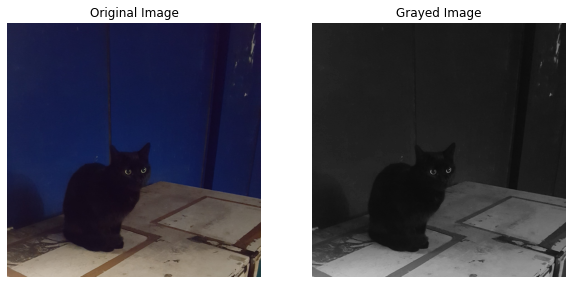

In [98]:
cat_image = io.imread('./images/cat.jpg')
cat_grayed = color.rgb2gray(cat_image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.imshow(cat_image, cmap='gray')
plt.title('Original Image'); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(cat_grayed, cmap='gray')
plt.title('Grayed Image'); plt.axis('off')
plt.show()

## Segmentation using SLIC

In [99]:
def slic_segmentation(img, n_segments):
  segments_slic = segmentation.slic(img, n_segments=n_segments, compactness=10,sigma=1)
  print(f"SLIC number of unique segments: {len(np.unique(segments_slic))}")
  plt.imshow(segmentation.mark_boundaries(img, segments_slic))
  plt.title('SLIC'); plt.axis('off')
  plt.show()

### \# of segment: 10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  


SLIC number of unique segments: 8


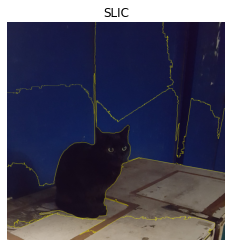

In [100]:
slic_segmentation(cat_image, 10)

### \# of segment: 50

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  


SLIC number of unique segments: 44


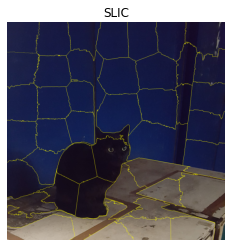

In [101]:
slic_segmentation(cat_image, 50)

### \# of segment: 100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  


SLIC number of unique segments: 92


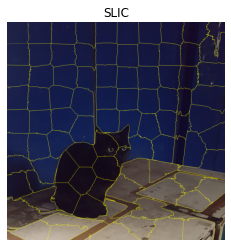

In [102]:
slic_segmentation(cat_image, 100)

## Visualisation using median

In [103]:
def superpixel_median_image(image, slic_labels):
  """
  Code taken from https://stackoverflow.com/a/57746835
  Turn image into superpixel image, given SLIC segment
  labels.
  """
  im_rp = image.reshape((image.shape[0]*image.shape[1],image.shape[2]))
  sli_1d = np.reshape(slic_labels, -1)
  uni = np.unique(sli_1d)
  new_img = np.zeros(im_rp.shape)
  for i in uni:
    loc = np.where(sli_1d==i)[0]
    mm = np.median(im_rp[loc,:],axis=0)
    new_img[loc,:] = mm
  output_image = np.reshape(new_img,[image.shape[0],image.shape[1],image.shape[2]]).astype('uint8')

  plt.figure(figsize=(10, 5))
  plt.imshow(output_image)
  plt.title('Median Superpixel'); plt.axis('off')
  plt.show()

### \# of segment: 10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  """Entry point for launching an IPython kernel.


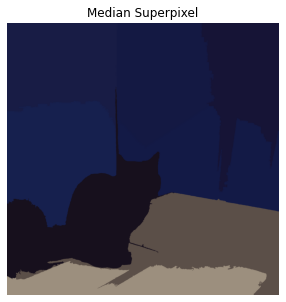

In [104]:
segments_slic = segmentation.slic(cat_image, n_segments=10, compactness=10,sigma=1)
superpixel_median_image(cat_image, segments_slic)

### \# of segment: 50

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  """Entry point for launching an IPython kernel.


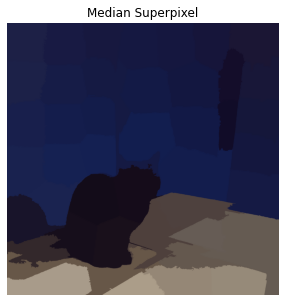

In [105]:
segments_slic = segmentation.slic(cat_image, n_segments=50, compactness=10,sigma=1)
superpixel_median_image(cat_image, segments_slic)

### \# of segment: 100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  """Entry point for launching an IPython kernel.


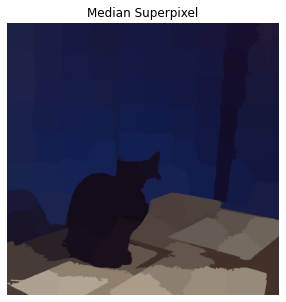

In [106]:
segments_slic = segmentation.slic(cat_image, n_segments=100, compactness=10,sigma=1)
superpixel_median_image(cat_image, segments_slic)

## Correlation between \# of segment with segmentation result

In [107]:
def special_superpixel_median_image(image, slic_labels):
  """
  Code taken from https://stackoverflow.com/a/57746835
  Turn image into superpixel image, given SLIC segment
  labels.
  """
  im_rp = image.reshape((image.shape[0]*image.shape[1],image.shape[2]))
  sli_1d = np.reshape(slic_labels, -1)
  uni = np.unique(sli_1d)
  new_img = np.zeros(im_rp.shape)
  for i in uni:
    loc = np.where(sli_1d==i)[0]
    mm = np.median(im_rp[loc,:],axis=0)
    new_img[loc,:] = mm
  output_image = np.reshape(new_img,[image.shape[0],image.shape[1],image.shape[2]]).astype('uint8')
  return output_image

In [108]:
result = []
segments = [10, 30, 50, 80, 100, 200, 300, 450, 700]
for item in segments:
  segments_slic = segmentation.slic(cat_image, n_segments=item, compactness=10,sigma=1)
  superpixel_img = special_superpixel_median_image(cat_image, segments_slic)
  result.append(superpixel_img)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  after removing the cwd from sys.path.


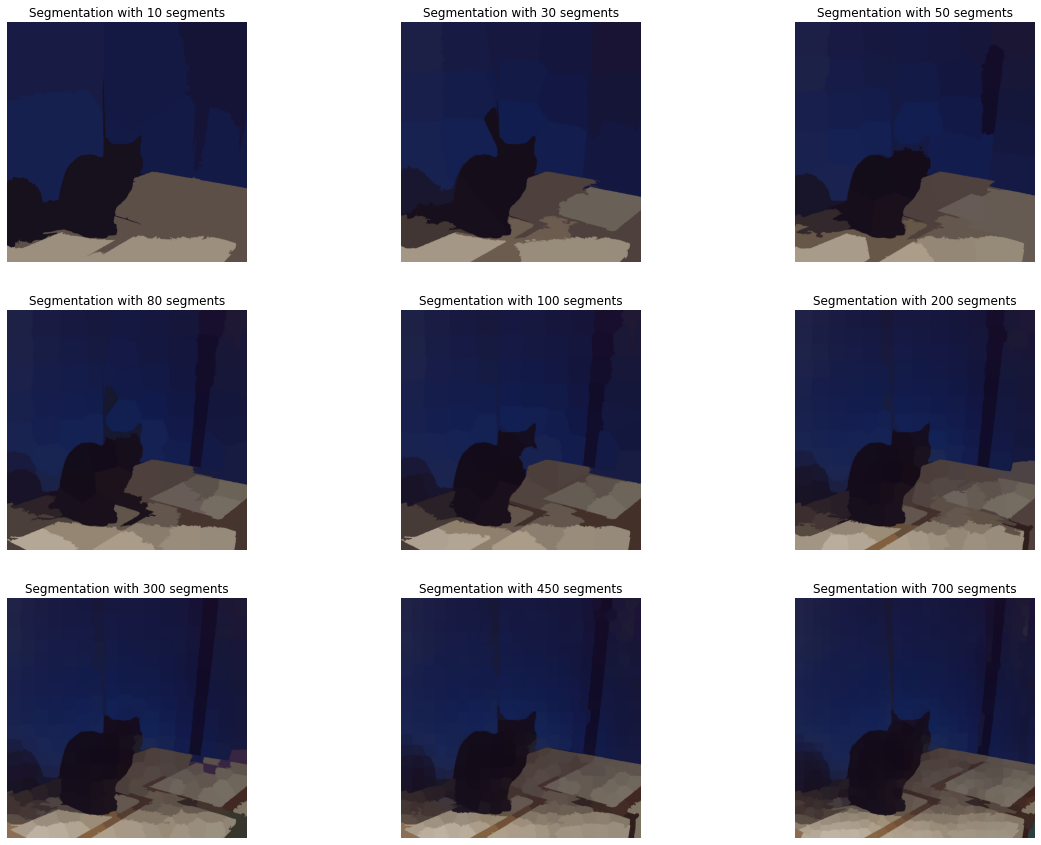

In [109]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1); plt.imshow(result[0])
plt.title('Segmentation with 10 segments'); plt.axis("off")
plt.subplot(3,3,2); plt.imshow(result[1])
plt.title("Segmentation with 30 segments"); plt.axis("off")
plt.subplot(3,3,3); plt.imshow(result[2])
plt.title('Segmentation with 50 segments'); plt.axis("off")
plt.subplot(3,3,4); plt.imshow(result[3])
plt.title('Segmentation with 80 segments'); plt.axis("off")
plt.subplot(3,3,5); plt.imshow(result[4])
plt.title('Segmentation with 100 segments'); plt.axis("off")
plt.subplot(3,3,6); plt.imshow(result[5])
plt.title('Segmentation with 200 segments'); plt.axis("off")
plt.subplot(3,3,7); plt.imshow(result[6])
plt.title('Segmentation with 300 segments'); plt.axis("off")
plt.subplot(3,3,8); plt.imshow(result[7])
plt.title('Segmentation with 450 segments'); plt.axis("off")
plt.subplot(3,3,9); plt.imshow(result[8])
plt.title('Segmentation with 700 segments'); plt.axis("off")
plt.show()

Apabila percobaan hanya terbatas pada poin b yang mana jumlah segment yang digunakan adalah 10, 50 dan 100, maka hasil segmentasi terbaik ada pada gambar dengan 10 segment. Mengingat hasil kucing yang terbentuk cukup sempurna apabila dibandingkan dengan segment 50 dan 100 meskipun pada segment 10 bayangan milik si kucing berbentuk seolah-olah menjadi bagian tubuh kucing.

Namun saya merasa dari percobaan poin b tidak dapat ditarik kesimpulan apapun mengingat sample yang digunakan sangat sedikit. Dengan demikian berikut saya lakukan percobaan sebanyak 9x dengan jumlah segment 10, 30, 50, 80, 100, 200, 300, 450 dan 700. Dari hasil percobaan yang saya lakukan, hasil dari segment 700 memberikan citra yang terbaik relative terhadap citra asli. Corak pada alas tempat kucing tersebut berdiri, bayangan milik kucing bahkan bayangan yang ada pada tembok pun tercitra dengan cukup baik.

Dari hasil percobaan tersebut dapat disimpulkan bahwa semakin banyak jumlah segmen yang digunakan akan mengakibatkan hasil segmentasi yang semakin sempurna/baik relative terhadap citra asli. Hal ini dikarenakan segment yang banyak cenderung mencakup area yang kecil, dengan demikian tidak terlalu banyak informasi yang tercakup pada masing-masing segment tersebut. Oleh karena itu, mudah bagi researcher untuk memprediksi hasil dari segmentasi tersebut. Di samping itu, semakin kecil area dari segment, maka detail-detail kecil pada image juga akan tertangani sehingga apabila objectivenya adalah mendeteksi detail kecil akan tercitra dengan baik. Namun terdapat drawback dari jumlah segment yang banyak, mengakibatkan proses segmentasi berlangsung sangat lama, mengingat perlu mengelompokkan masing-masing segment ke dalam kelompok yang sama/sejenis/similar.

## Image Conversion to LAB color space

### Convert from RGB to LAB

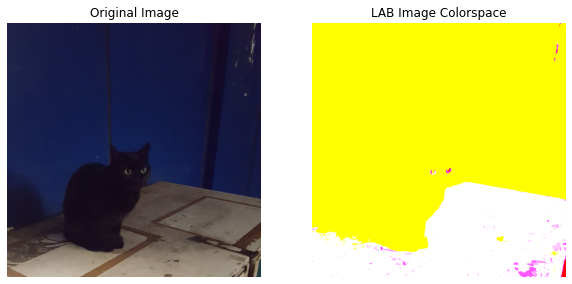

In [110]:
cat_lab = color.rgb2lab(cat_image)
L = cat_lab[:, :, 0]
A = cat_lab[:, :, 1]
B = cat_lab[:, :, 2]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.imshow(cat_image)
plt.title('Original Image'); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(cat_lab)
plt.title('LAB Image Colorspace'); plt.axis('off')
plt.show()

### Gamma Correction on L channel

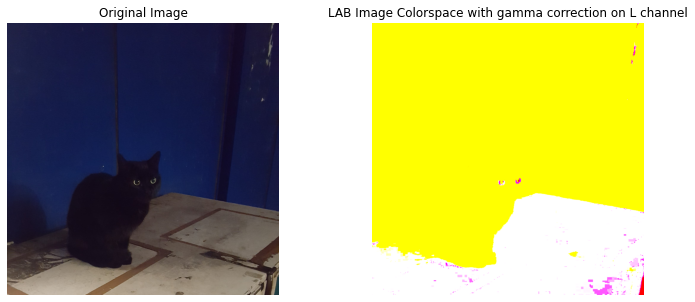

In [111]:
L_gamma_corrected = exposure.adjust_gamma(L, gamma=1.15)
cat_lab[:, :, 0] = L_gamma_corrected

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1); plt.imshow(cat_image)
plt.title('Original Image'); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(cat_lab)
plt.title('LAB Image Colorspace with gamma correction on L channel'); plt.axis('off')
plt.show()

## Reconvert to RGB color space

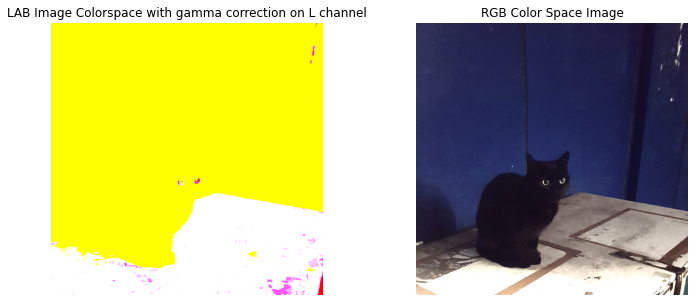

In [112]:
cat_image_back2rgb = color.lab2rgb(cat_lab)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1); plt.imshow(cat_lab)
plt.title('LAB Image Colorspace with gamma correction on L channel'); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(cat_image_back2rgb)
plt.title('RGB Color Space Image'); plt.axis('off')
plt.show()

### Segmentation with 100 segments

### Convert image to uint8

In [113]:
cat_image_back2rgb = util.img_as_ubyte(cat_image_back2rgb)

### Implement segmentation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  


SLIC number of unique segments: 93


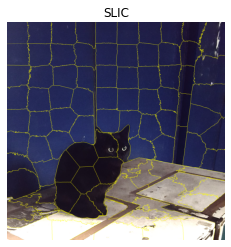

In [114]:
slic_segmentation(cat_image_back2rgb, 100)

## Generalize \# of segment after reconvert

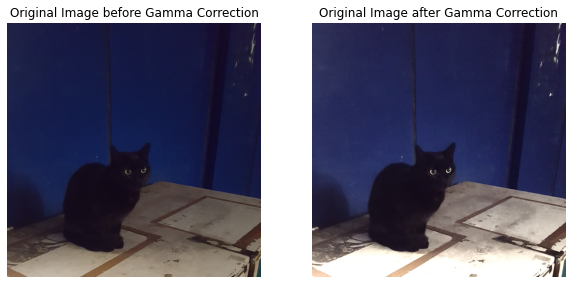

In [115]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1); plt.imshow(cat_image)
plt.title('Original Image before Gamma Correction'); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(cat_image_back2rgb)
plt.title("Original Image after Gamma Correction"); plt.axis("off")
plt.show()

In [116]:
result = []
images = [cat_image, cat_image_back2rgb]
for item in images:
  segments_slic = segmentation.slic(cat_image, n_segments=100, compactness=10,sigma=1)
  superpixel_img = special_superpixel_median_image(item, segments_slic)
  result.append(superpixel_img)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  after removing the cwd from sys.path.


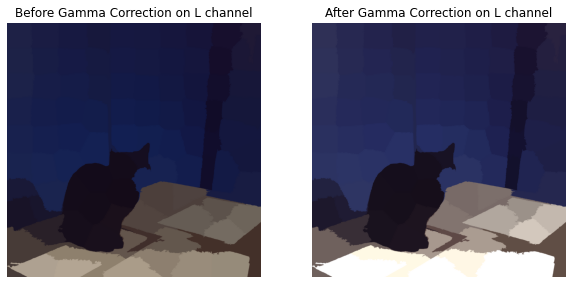

In [117]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1); plt.imshow(result[0])
plt.title('Before Gamma Correction on L channel'); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(result[1])
plt.title("After Gamma Correction on L channel"); plt.axis("off")
plt.show()

Setelah diterapkan gamma correction citra terlihat lebih cerah. Utamanya pada lantai tempat kucing tersebut berdiri. Tidak hanya itu, si kucing serta tembok biru disekitarnya pun terlihat lebih cerah apabila dibandingkan dengan original image sebelum gamma correction. Apabila dilihat dari segi hasil segmentasi dengan 100 segment, tentu yang terlihat pertama kali adalah hasil dari segmentasi terlihat lebih cerah. Bagian lantai tempat kucing tersebut berdiri bukan lagi warna beige yang mendominasi, kini adalah warna putih. Selain itu bayangan milik kucing terlihat lebih jelas dan warna hitam pada badan kucing terlihat lebih cerah. Juga tembok disekitar kucing memiliki intensitas yang lebih tinggi dari sebelumnya. Perbedaan pada segmentasi terjadi karena pada image yang digunakan untuk segmentasi memang sudah berbeda, sehingga ketika diterapkan segmentasi perbedaan tersebut menjadi semakin mencolok. Perbedaan yang paling kental terlihat ada pada lantai, karena warna lantai setelah correction menjadi lebih cerah, setelah segmentasi bagian tersebut ditranslasikan menjadi warna putih.